In [1]:
#importing dataset from kaggle server to google collabe notebook
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [2]:
import zipfile
zipdataset = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zipdataset.extractall('/content')
zipdataset.close()

In [3]:
import tensorflow as tw
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [4]:
#Generators is used to large amount of data

trainds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = "inferred",
    label_mode = "int",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

validationds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = "inferred",
    label_mode = "int",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
#Normalize the input from (0 to 256) to (0 to 1)

def process(image, label):
  image = tw.cast(image/255., tw.float32)
  return image, label

trainds = trainds.map(process)
validationds = validationds.map(process)

In [6]:
#create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding= 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding= 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding= 'valid'))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
traininglog = model.fit(trainds, epochs = 10, validation_data  = validationds)

Epoch 1/10
625/625 [==============================] - 68s 93ms/step - loss: 0.5978 - accuracy: 0.6738 - val_loss: 0.5245 - val_accuracy: 0.7382
Epoch 2/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4691 - accuracy: 0.7739 - val_loss: 0.5047 - val_accuracy: 0.7616
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3570 - accuracy: 0.8397 - val_loss: 0.5258 - val_accuracy: 0.7836
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2310 - accuracy: 0.9054 - val_loss: 0.7055 - val_accuracy: 0.7636
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1160 - accuracy: 0.9560 - val_loss: 0.9150 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0793 - accuracy: 0.9704 - val_loss: 1.1403 - val_accuracy: 0.7754
Epoch 7/10
625/625 [==============================] - 58s 91ms/step - loss: 0.0656 - accuracy: 0.9778 - val_loss: 1.1667 - val_accuracy

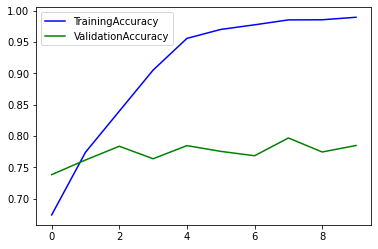

In [8]:
import matplotlib.pyplot as plt

plt.plot(traininglog.history['accuracy'], color = 'blue', label = 'TrainingAccuracy')
plt.plot(traininglog.history['val_accuracy'], color = 'green', label = 'ValidationAccuracy')
plt.legend()
plt.show()

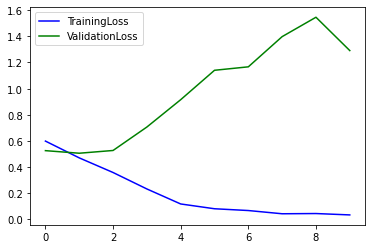

In [9]:
plt.plot(traininglog.history['loss'], color = 'blue', label = 'TrainingLoss')
plt.plot(traininglog.history['val_loss'], color = 'green', label = 'ValidationLoss')
plt.legend()
plt.show()

In [10]:
#How we can reduce overfitting problem?

#Add more data
#Data Augmentation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce Complexity

In [11]:
#Adding BatchNormalization & Dropout layers in CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding= 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding= 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding= 'valid'))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
traininglog = model.fit(trainds, epochs = 10, validation_data  = validationds)

Epoch 1/10
625/625 [==============================] - 74s 115ms/step - loss: 1.2592 - accuracy: 0.5925 - val_loss: 0.6445 - val_accuracy: 0.6470
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5871 - accuracy: 0.6898 - val_loss: 0.5441 - val_accuracy: 0.7212
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4947 - accuracy: 0.7606 - val_loss: 0.5385 - val_accuracy: 0.7138
Epoch 4/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4317 - accuracy: 0.8020 - val_loss: 0.4693 - val_accuracy: 0.7644
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3703 - accuracy: 0.8361 - val_loss: 0.4538 - val_accuracy: 0.8056
Epoch 6/10
625/625 [==============================] - 73s 115ms/step - loss: 0.2926 - accuracy: 0.8748 - val_loss: 0.5088 - val_accuracy: 0.7888
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.2206 - accuracy: 0.9076 - val_loss: 0.5442 - val_ac

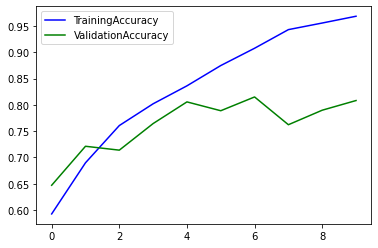

In [13]:
import matplotlib.pyplot as plt

plt.plot(traininglog.history['accuracy'], color = 'blue', label = 'TrainingAccuracy')
plt.plot(traininglog.history['val_accuracy'], color = 'green', label = 'ValidationAccuracy')
plt.legend()
plt.show()

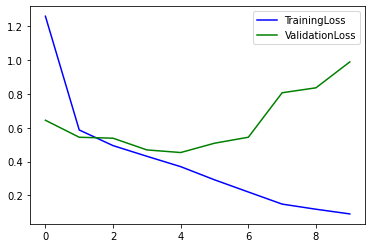

In [14]:
plt.plot(traininglog.history['loss'], color = 'blue', label = 'TrainingLoss')
plt.plot(traininglog.history['val_loss'], color = 'green', label = 'ValidationLoss')
plt.legend()
plt.show()

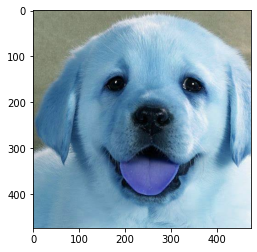

In [16]:
import cv2

testimg = cv2.imread('/content/dog.jpg')
plt.imshow(testimg)

In [17]:
testimg.shape

(474, 474, 3)

In [18]:
testimg = cv2.resize(testimg, (256, 256))
testinput = testimg.reshape((1, 256, 256, 3))
model.predict(testinput) #wrong prediction

1/1 [==============================] - 0s 235ms/step


array([[1.]], dtype=float32)

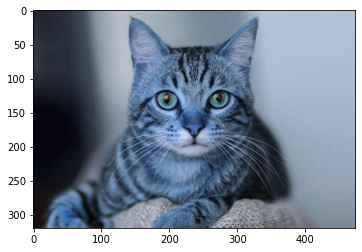

In [19]:
testimg = cv2.imread('/content/cat.jpg')
plt.imshow(testimg)

In [20]:
testimg.shape

(320, 474, 3)

In [21]:
testimg = cv2.resize(testimg, (256, 256))
testinput = testimg.reshape((1, 256, 256, 3))
model.predict(testinput)

1/1 [==============================] - 0s 15ms/step


array([[0.]], dtype=float32)